Reference from WWcodeMovieRecommender.ipynb

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
mpl.style.use('ggplot')

In [248]:
movies_df = pd.read_csv('datasets/data_movies.csv')

In [249]:
movies_df.head()

,movieId,name,categories
0,72,Minority Report,SciFi|Action
1,2,Going Away,SciFi|Kids|Horror|Fantasy
2,0,The Alien,SciFi|Kids|Horror
3,49,The Big Game,Sports|Musical|MartialArts
4,1,The Life of Bees,SciFi|Kids|Thriller|Documentary


In [250]:
movies_df.shape

(75, 3)

In [251]:
movies_df.categories.head()

0                       SciFi|Action
1          SciFi|Kids|Horror|Fantasy
2                  SciFi|Kids|Horror
3         Sports|Musical|MartialArts
4    SciFi|Kids|Thriller|Documentary
Name: categories, dtype: object

In [252]:
print(movies_df.categories.str.split('|').head())

0                         [SciFi, Action]
1          [SciFi, Kids, Horror, Fantasy]
2                   [SciFi, Kids, Horror]
3          [Sports, Musical, MartialArts]
4    [SciFi, Kids, Thriller, Documentary]
Name: categories, dtype: object


In [253]:
# remove the columns not need
del movies_df['name']
movies_df.head()

,movieId,categories
0,72,SciFi|Action
1,2,SciFi|Kids|Horror|Fantasy
2,0,SciFi|Kids|Horror
3,49,Sports|Musical|MartialArts
4,1,SciFi|Kids|Thriller|Documentary


In [254]:
movies_df[movies_df.categories.isnull()]

,movieId,categories


In [255]:
# import the ratings data
ratings_df = pd.read_csv('datasets/data_ratings.csv')
ratings_df.head()

,personId,movieId,progress,lastWatch
0,61,72,11%,3/21/20 8:20
1,71,73,14%,3/5/20 5:20
2,4,2,10%,1/1/70 0:00
3,16,3,2%,1/14/19 23:46
4,40,4,5%,8/5/19 16:12


In [256]:
ratings_df.shape

(1849, 4)

### Data Inspection & Visualization

In [257]:
# see the number of people that have watched movie 73
ratings_df[ratings_df.movieId == 73]

,personId,movieId,progress,lastWatch
1,71,73,14%,3/5/20 5:20
226,102,73,95%,8/30/19 20:00
1812,0,73,9%,1/29/20 19:37
1813,12,73,3%,9/5/18 2:59
1814,34,73,35%,1/16/20 14:26
1815,61,73,5%,2/26/19 19:34
1816,64,73,1%,8/24/18 14:36
1817,70,73,5%,10/10/18 3:34
1818,76,73,2%,11/1/18 0:52
1819,102,73,2%,10/9/18 3:56


In [258]:
# build a cross-tabluation table that shows the frequency with certain groups of data appear
# show which movies a person watched
pd.crosstab(ratings_df.personId, ratings_df.movieId)

movieId,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
personId,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
294,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
ratings_df.dtypes

personId      int64
movieId       int64
progress     object
lastWatch    object
dtype: object

In [260]:
# data conversion, convert lastWatch string to date object
ratings_df['lastWatch']=pd.to_datetime(ratings_df['lastWatch'])

In [261]:
ratings_df.dtypes

personId              int64
movieId               int64
progress             object
lastWatch    datetime64[ns]
dtype: object

In [262]:
ratings_df.head()

,personId,movieId,progress,lastWatch
0,61,72,11%,2020-03-21 08:20:00
1,71,73,14%,2020-03-05 05:20:00
2,4,2,10%,1970-01-01 00:00:00
3,16,3,2%,2019-01-14 23:46:00
4,40,4,5%,2019-08-05 16:12:00


In [263]:
# convert progress percentage string to numeric data
ratings_df['progress'] = ratings_df['progress'].str.rstrip('%').astype('float') / 100.0

In [264]:
ratings_df.dtypes

personId              int64
movieId               int64
progress            float64
lastWatch    datetime64[ns]
dtype: object

In [265]:
ratings_df.head()

,personId,movieId,progress,lastWatch
0,61,72,0.11,2020-03-21 08:20:00
1,71,73,0.14,2020-03-05 05:20:00
2,4,2,0.10,1970-01-01 00:00:00
3,16,3,0.02,2019-01-14 23:46:00
4,40,4,0.05,2019-08-05 16:12:00


In [266]:
movies_df.head()

,movieId,categories
0,72,SciFi|Action
1,2,SciFi|Kids|Horror|Fantasy
2,0,SciFi|Kids|Horror
3,49,Sports|Musical|MartialArts
4,1,SciFi|Kids|Thriller|Documentary


In [267]:
ratings_df.head()

,personId,movieId,progress,lastWatch
0,61,72,0.11,2020-03-21 08:20:00
1,71,73,0.14,2020-03-05 05:20:00
2,4,2,0.10,1970-01-01 00:00:00
3,16,3,0.02,2019-01-14 23:46:00
4,40,4,0.05,2019-08-05 16:12:00


In [268]:
# count the amount of times a personId appears in the dataset 
# help us understand who watches the most movies
ratings_df.groupby('personId').size()

personId
0       8
1       3
2       1
3       5
4      33
       ..
293     3
294     4
295     1
296     2
297    14
Length: 287, dtype: int64

In [269]:
# print row for a particular person (ie person 61) = show the movies they've watch
ratings_df.loc[ratings_df['personId'] == 61]

,personId,movieId,progress,lastWatch
0,61,72,0.11,2020-03-21 08:20:00
5,61,5,0.43,1970-01-01 00:00:00
14,61,1,0.04,2018-04-13 03:02:00
32,61,4,0.07,2018-07-19 08:33:00
45,61,5,0.08,2019-11-14 20:42:00
69,61,21,0.97,2019-03-04 00:32:00
113,61,10,0.04,2018-05-22 23:30:00
148,61,15,0.02,2020-04-02 05:13:00
207,61,54,0.24,2019-11-13 01:09:00
371,61,5,0.74,2019-06-16 05:01:00


In [270]:
# count the amount of times a movieId appears in the dataset
# see which movies are the most popular
ratings_df.groupby('movieId').size()

movieId
0       1
1       2
2       3
3      10
4       4
       ..
202     1
203     1
204     1
205     1
206     1
Length: 207, dtype: int64

In [271]:
# print rows for a particular movie (ie movie 5 - The Escape to Witch Mountain) - show the people that have watched it
ratings_df.loc[ratings_df['movieId'] == 5]

,personId,movieId,progress,lastWatch
5,61,5,0.43,1970-01-01 00:00:00
18,123,5,0.22,1970-01-01 00:00:00
33,70,5,0.80,2020-03-13 04:56:00
45,61,5,0.08,2019-11-14 20:42:00
360,4,5,0.05,2018-07-05 02:08:00
...,...,...,...,...
436,276,5,0.02,2019-10-22 09:22:00
437,277,5,0.52,2020-02-14 05:28:00
438,282,5,0.01,2020-03-16 21:07:00
439,286,5,0.94,2019-10-16 19:37:00


In [272]:
# calculate the average watch time (ie progress) percentage by category per person
# figure out person's favorite category
# this function can be limited by a set amount of categories (for now SciFi and Drama)

# function to get the category progress
def get_category_watch_time(ratings, movies, categories, column_names):
    category_progress = pd.DataFrame(columns=['personId'])
    
    #add personId to list of columns
    column_names.insert(0, 'personId')
    
    for category in categories: # loop for SciFi and Drama categories
        #retriveve records with the given category (ie, first iteration is SciFi, second iteration is Drama)
        movie_categories = movies[movies['categories'].str.contains(category)]
        
        #determine the average watch time for the given category; retain the persionId
        avg_watch_time_per_person = ratings[ratings['movieId']\
                                    .isin(movie_categories['movieId'])]\
                                    .loc[:, ['personId', 'progress']]\
                                    .groupby(['personId'])['progress']\
                                    .mean().round(2).reset_index()
        
        # merge the progress for the given category with prior categories
        category_progress = category_progress.merge(avg_watch_time_per_person, on='personId', how='outer')
    
    #u updated column names to be meaningful column names
    category_progress.columns = column_names
    return category_progress

In [273]:
# Calculate the acerage rating of sciFi and Drama categories
category_watch_time = get_category_watch_time(ratings_df, movies_df, ['SciFi', 'Drama'],['avg_scifi_watch', 'avg_drama_watch'])
category_watch_time

,personId,avg_scifi_watch,avg_drama_watch
0,0,0.52,0.44
1,1,0.50,0.85
2,2,0.25,0.25
3,3,0.99,0.98
4,4,0.24,0.18
...,...,...,...
231,244,NaN,0.99
232,248,NaN,0.03
233,257,NaN,0.02
234,281,NaN,0.03


In [274]:
def get_list_of_categories(movies):
    category_list = []
    
    for category in movies.categories.str.split('|'):
        for name in category:
            if name not in category_list: 
                category_list.append(name.strip())
            
    return category_list

In [275]:
def get_column_name_list(category_list):
    column_name = []
    
    for category in category_list:
        column_name.append('avg_' + category.strip() + '_watch')
      
    return column_name

In [276]:
# category watch time across ALL people across ALL categories
def get_all_category_watch_time(ratings, movies):
    category_progress = pd.DataFrame(columns = ['personId'])
    category_list = get_list_of_categories(movies)
    column_names = get_column_name_list(category_list)
    
    # add personId to list of columns
    column_names.insert(0, 'personId')
    
    for category in category_list:        
        movie_categories = movies[movies['categories'].str.contains(category)]                                 
            
        # determine the average watch time for the given category: retain the personId
        avg_watch_time_per_user = ratings[ratings['movieId']\
                                          .isin(movie_categories['movieId'])]\
                                            .loc[:, ['personId', 'progress']]\
                                            .groupby(['personId'])['progress']\
                                            .mean()\
                                            .round(2)\
                                            .reset_index()
        
        # merge the progress for the given category with the prior categories
        category_progress = category_progress.merge(avg_watch_time_per_user, on='personId', how='outer')
    
    category_progress.columns = column_names
    return category_progress


In [277]:
# Calculate the average rating all categories per user
category_watch_time_df = get_all_category_watch_time(ratings_df, movies_df)
category_watch_time_df

,personId,avg_SciFi_watch,avg_Action_watch,avg_Kids_watch,avg_Horror_watch,avg_Fantasy_watch,avg_Sports_watch,avg_Musical_watch,avg_MartialArts_watch,avg_Thriller_watch,...,avg_Romance_watch,avg_Animation_watch,avg_Tv_watch,avg_Disaster_watch,avg_Epic_watch,avg_War_watch,avg_Western_watch,avg_Slasher_watch,avg_History_watch,avg_Horror_watch
0,0,0.52,0.20,0.63,0.09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,NaN,0.09
1,1,0.50,NaN,0.14,0.23,0.85,NaN,NaN,NaN,NaN,...,0.23,NaN,0.85,NaN,NaN,NaN,NaN,NaN,NaN,0.23
2,2,0.25,NaN,NaN,NaN,NaN,NaN,0.25,0.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.99,0.98,0.74,NaN,NaN,0.22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN
4,4,0.24,0.23,0.32,0.09,0.22,0.09,0.03,0.16,NaN,...,0.05,0.02,0.06,0.02,0.05,0.35,NaN,NaN,0.04,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN
264,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN
265,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.56,NaN,NaN,NaN,NaN
266,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN


In [278]:
# category watch time for a single person
# print rows for a particular person (ie person 61) - show the movies they've watch
category_watch_time_df.loc[category_watch_time_df['personId'] == 61]

,personId,avg_SciFi_watch,avg_Action_watch,avg_Kids_watch,avg_Horror_watch,avg_Fantasy_watch,avg_Sports_watch,avg_Musical_watch,avg_MartialArts_watch,avg_Thriller_watch,...,avg_Romance_watch,avg_Animation_watch,avg_Tv_watch,avg_Disaster_watch,avg_Epic_watch,avg_War_watch,avg_Western_watch,avg_Slasher_watch,avg_History_watch,avg_Horror_watch
46,61,0.24,0.11,0.31,0.31,0.12,0.27,0.16,0.32,0.05,...,0.35,0.01,0.05,NaN,0.52,0.24,NaN,0.21,0.04,0.31


### Training

In [279]:
category_watch_time_df.shape

(268, 25)

In [280]:
category_watch_time_df.head()

,personId,avg_SciFi_watch,avg_Action_watch,avg_Kids_watch,avg_Horror_watch,avg_Fantasy_watch,avg_Sports_watch,avg_Musical_watch,avg_MartialArts_watch,avg_Thriller_watch,...,avg_Romance_watch,avg_Animation_watch,avg_Tv_watch,avg_Disaster_watch,avg_Epic_watch,avg_War_watch,avg_Western_watch,avg_Slasher_watch,avg_History_watch,avg_Horror_watch
0,0,0.52,0.20,0.63,0.09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,NaN,0.09
1,1,0.50,NaN,0.14,0.23,0.85,NaN,NaN,NaN,NaN,...,0.23,NaN,0.85,NaN,NaN,NaN,NaN,NaN,NaN,0.23
2,2,0.25,NaN,NaN,NaN,NaN,NaN,0.25,0.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.99,0.98,0.74,NaN,NaN,0.22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN
4,4,0.24,0.23,0.32,0.09,0.22,0.09,0.03,0.16,NaN,...,0.05,0.02,0.06,0.02,0.05,0.35,NaN,NaN,0.04,0.09


In [281]:
# replace NaN with 0
category_watch_time_df = category_watch_time_df.fillna(0)
category_watch_time_df.head()

,personId,avg_SciFi_watch,avg_Action_watch,avg_Kids_watch,avg_Horror_watch,avg_Fantasy_watch,avg_Sports_watch,avg_Musical_watch,avg_MartialArts_watch,avg_Thriller_watch,...,avg_Romance_watch,avg_Animation_watch,avg_Tv_watch,avg_Disaster_watch,avg_Epic_watch,avg_War_watch,avg_Western_watch,avg_Slasher_watch,avg_History_watch,avg_Horror_watch
0,0,0.52,0.20,0.63,0.09,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.40,0.0,0.0,0.00,0.09
1,1,0.50,0.00,0.14,0.23,0.85,0.00,0.00,0.00,0.0,...,0.23,0.00,0.85,0.00,0.00,0.00,0.0,0.0,0.00,0.23
2,2,0.25,0.00,0.00,0.00,0.00,0.00,0.25,0.25,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
3,3,0.99,0.98,0.74,0.00,0.00,0.22,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.25,0.0,0.0,0.00,0.00
4,4,0.24,0.23,0.32,0.09,0.22,0.09,0.03,0.16,0.0,...,0.05,0.02,0.06,0.02,0.05,0.35,0.0,0.0,0.04,0.09


In [282]:
# remove presonId from dataframe
category_watch_time_list = category_watch_time_df.drop(['personId'], axis=1)

In [283]:
category_watch_time_list.head()

,avg_SciFi_watch,avg_Action_watch,avg_Kids_watch,avg_Horror_watch,avg_Fantasy_watch,avg_Sports_watch,avg_Musical_watch,avg_MartialArts_watch,avg_Thriller_watch,avg_Documentary_watch,...,avg_Romance_watch,avg_Animation_watch,avg_Tv_watch,avg_Disaster_watch,avg_Epic_watch,avg_War_watch,avg_Western_watch,avg_Slasher_watch,avg_History_watch,avg_Horror_watch
0,0.52,0.20,0.63,0.09,0.00,0.00,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.40,0.0,0.0,0.00,0.09
1,0.50,0.00,0.14,0.23,0.85,0.00,0.00,0.00,0.0,0.00,...,0.23,0.00,0.85,0.00,0.00,0.00,0.0,0.0,0.00,0.23
2,0.25,0.00,0.00,0.00,0.00,0.00,0.25,0.25,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
3,0.99,0.98,0.74,0.00,0.00,0.22,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.25,0.0,0.0,0.00,0.00
4,0.24,0.23,0.32,0.09,0.22,0.09,0.03,0.16,0.0,0.18,...,0.05,0.02,0.06,0.02,0.05,0.35,0.0,0.0,0.04,0.09


In [284]:
# Turn the dataset into a list
category_watch_time_list = category_watch_time_list.values
print(category_watch_time_list)

[[0.52 0.2  0.63 ... 0.   0.   0.09]
 [0.5  0.   0.14 ... 0.   0.   0.23]
 [0.25 0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


In [285]:
# import K-Means
from sklearn.cluster import KMeans

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 21):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=20, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(category_watch_time_list)
    distortions.append(km.inertia_)

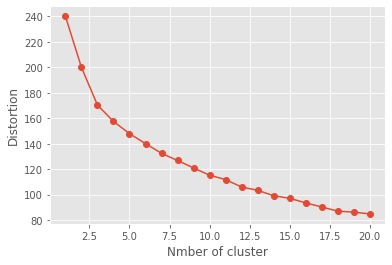

In [286]:
# plot
plt.plot(range(1,21), distortions, marker='o')
plt.xlabel('Nmber of cluster')
plt.ylabel('Distortion')
plt.show()

In [287]:
# Import KMeans (Key part)
from sklearn.cluster import KMeans

# Create an instance of KMeans to find 3 clusters
# km = KMeans(algorithm = 'auto', copy_x=True, init='k-means++', max_iter=300, n_cluster=3, n_init=10, n_jobs=1,
#      , precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)
km = KMeans(n_clusters=20, random_state=0)

# Use fit_predict to cluster the dataset
# Returns a cluster prediction for each_person / ie cluster labels
predictions= km.fit_predict(category_watch_time_list)

print(predictions)
print('-------')
print(type(predictions))
print(predictions.shape)
print(category_watch_time_list.shape)

[ 7  8  2 18 11  2 11  5 18 10  2 12 12  3 11 11  5 11  2  5 10  2  2  5
 11  5  0  2  2  2  7  2  7  2  1 12  7 13 11  5 12  7 10 11 12 11  3  2
 12  3 12  6 11  2  1  2 11  3 12 11  2 11 11  3  3  3  7 13  2  0  2 14
 16 14 11 12  3 11  8 17  2  2  2  5 11 11 11  2  2  1 15  0 11  5 11 13
  2  6  7  7  2  2  7  5  1  5  5  2  3 11 11  5  2  7  2 15  4 11  0  5
  5 11  3  2 12  0 11 11 11 11  2  5 11 11 11 11 11 11  5 15  1  7  2  3
  2 11  0  5  8  6  3  6  1  1 12  7  2 11  2 11 11  7 11  1  5  6  1  2
  5  2  1  5 11  2  5  8 13  5 11  2 11  2  8  8  2 11 11 15  2  3 11 11
 11  2  2 18  4  3  2 12 12 13 11  0  5  2  5  8 11  3  0  0  6  0  2  7
  2  2  2  0  2  2  6  2  2  0  0  0  2  6 11  0  0  0  2  0  0  0  2  2
  2  2  0  2  2  2  2  9  2  9  2  9  2  2 19  2  9  2  2  2  9  2  2  9
  2  9  2  2]
-------
<class 'numpy.ndarray'>
(268,)
(268, 24)


In [288]:
# convert numpy array to dataframe and give column name of cluster
cluster_df = pd.DataFrame(data=predictions)
cluster_df.columns = ['assigned_cluster']
cluster_df

,assigned_cluster
0,7
1,8
2,2
3,18
4,11
...,...
263,9
264,2
265,9
266,2


In [289]:
print('The shape is -->', cluster_df.shape)
print('The shape is -->', category_watch_time_df.shape)

The shape is --> (268, 1)
The shape is --> (268, 25)


### Assigned Cluster

Now, that we understand which cluster a person is assigned to, we can recommend movies to this person based on their
assigned group (ie cluster)

In [290]:
# merge data to see the assigned cluser for personId and drop unnecessary columns
ratings_cluster_df = pd.DataFrame(columns = ['personId', 'assigned_cluster'])
ratings_cluster_df = pd.concat([cluster_df, category_watch_time_df], axis=1)
ratings_cluster_df = ratings_cluster_df[ratings_cluster_df.columns[ratings_cluster_df\
                                                                   .columns\
                                                                   .isin(['personId', 'assigned_cluster'])]]

ratings_cluster_df

,assigned_cluster,personId
0,7,0
1,8,1
2,2,2
3,18,3
4,11,4
...,...,...
263,9,210
264,2,212
265,9,244
266,2,248


In [291]:
# count the amount of times a cluster appears in the dataset
ratings_cluster_df.groupby('assigned_cluster').size()

assigned_cluster
0     21
1     10
2     76
3     15
4      2
5     24
6      8
7     14
8      7
9      7
10     3
11    51
12    13
13     5
14     2
15     4
16     1
17     1
18     3
19     1
dtype: int64

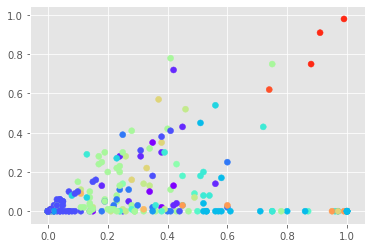

In [292]:
# plot the data
plt.scatter(category_watch_time_list[:,0], category_watch_time_list[:,1], c=km.labels_, cmap='rainbow')

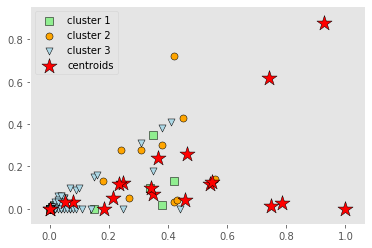

In [293]:
# visualizae the clusters that k-means identified in the dataset together with the cluster centroids.
# These are stored under the cluster_centers_attribute of the fitted KMeans object
# plot the 3 clusters.

plt.scatter(category_watch_time_list[predictions == 0, 0], category_watch_time_list[predictions == 0, 1], 
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1'
           )

plt.scatter(category_watch_time_list[predictions == 1, 0], category_watch_time_list[predictions == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2'
            )

plt.scatter(category_watch_time_list[predictions == 2, 0], category_watch_time_list[predictions == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3'
            )

#plot the centroids
plt.scatter(
    km.cluster_centers_[:,0], km.cluster_centers_[:,1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### Understanding Clusters

At this point, we have clustered poeople into 20 clusters. With our K-mean clustering model, we can produce a list of all people and which cluster they belong to. So, we can take a specific cluster and study the person's characterization along known dimensions.
<br><br>
Let's study the characteristics of cluster num 6

In [294]:
# What are the commonality between the people in cluster 6
# Show people assigned to Cluster 6
ratings_cluster_df = ratings_cluster_df.loc[ratings_cluster_df['assigned_cluster'] == 5]

In [295]:
ratings_cluster_df.shape

(24, 2)

In [296]:
ratings_cluster_df

,assigned_cluster,personId
7,5,8
16,5,17
19,5,20
23,5,24
25,5,28
39,5,51
83,5,115
93,5,131
103,5,143
105,5,145


In [297]:
# Import the data
ratings = pd.read_csv('datasets/data_ratings.csv')
movies = pd.read_csv('datasets/data_movies.csv')

# Get only the people progress records thta appear in cluster 6
cluster6_ratings_df = ratings[ratings['personId'].isin(ratings_cluster_df['personId'])]

# print people
cluster6_ratings_df

,personId,movieId,progress,lastWatch
94,165,46,100%,11/22/19 5:06
170,8,17,45%,3/29/19 15:47
177,17,24,80%,12/29/19 4:45
179,20,26,5%,1/3/20 22:17
183,24,30,13%,12/6/19 17:14
...,...,...,...,...
1543,249,58,100%,5/21/19 19:33
1557,289,58,100%,4/26/18 20:34
1558,293,58,100%,1/14/20 13:56
1599,249,48,11%,5/22/19 18:25


In [298]:
# sort values by percentage (sorting by string value)
cluster6_ratings_df.sort_values('progress', inplace=True, ascending=False)

cluster6_ratings_df

C:\Users\Norto\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,personId,movieId,progress,lastWatch
257,146,104,98%,11/1/19 22:08
356,293,203,96%,3/3/20 18:36
271,165,118,96%,3/6/20 6:25
855,189,23,94%,6/9/19 23:58
329,249,176,93%,11/24/19 16:43
...,...,...,...,...
1338,201,24,100%,2/15/19 21:28
1349,233,24,100%,9/24/19 18:52
1350,236,24,100%,9/20/19 21:09
1355,249,24,100%,5/22/19 14:49


In [299]:
# see how many people watched each movie
cluster6_ratings_df.groupby(['movieId'])['personId'].count()

movieId
12      1
17      3
23      3
24     22
26      1
30      1
34      1
39      1
45      1
46      1
48      2
56      1
58     19
60      1
73      1
91      1
102     1
103     1
104     1
107     1
118     1
128     1
135     1
141     1
159     1
165     1
167     1
176     1
200     1
203     1
Name: personId, dtype: int64

In [300]:
# convert progress percentage string to numerc data
cluster6_ratings_df['progress'] = cluster6_ratings_df['progress'].str.rstrip('%').astype('float') / 100.0

# limit to only movies that are above a 90% watch rate
cluster6_ratings_df = cluster6_ratings_df.loc[cluster6_ratings_df['progress'] > .90]

print(cluster6_ratings_df.shape)

cluster6_ratings_df

(47, 4)


C:\Users\Norto\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,personId,movieId,progress,lastWatch
257,146,104,0.98,11/1/19 22:08
356,293,203,0.96,3/3/20 18:36
271,165,118,0.96,3/6/20 6:25
855,189,23,0.94,6/9/19 23:58
329,249,176,0.93,11/24/19 16:43
1496,152,58,1.00,9/17/19 15:52
1456,51,58,1.00,10/9/19 9:21
1446,24,58,1.00,11/13/19 17:02
1488,131,58,1.00,6/4/19 16:18
1492,143,58,1.00,2/26/19 22:42


In [302]:
# Get the movie categories for movies watched (movieId) by people in cluster

cluster6_movies_watched_df = movies[movies['movieId'].isin(cluster6_ratings_df['movieId'])]

#Get rid of NaN
cluster6_movies_watched_df.dropna(subset=['categories'], inplace=True)
category_list = get_list_of_categories(cluster6_movies_watched_df)

print('The amount of categories for Cluster 6: ', len(category_list))
print('The categories in Cluster 6', category_list)

The amount of categories for Cluster 6:  6
The categories in Cluster 6 ['SciFi', 'Kids', 'Tv', 'Epic', 'Sports', 'Western']


C:\Users\Norto\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [304]:
# The amount of possible categories
movies = pd.read_csv('datasets/data_movies.csv')
movies.dropna(subset=['categories'], inplace=True)
print("The amount of total possible categories: ", len(get_list_of_categories(movies)))

The amount of total possible categories:  24


## Final Result
### When a person logs in to watch a movie, retrieve the person ID, determine the cluster the person belongs to and recommend movies with categories associated to that cluster